# Map Obesity dataset into Phenopackets

### Imports

In [27]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import phenopackets

from google.protobuf.timestamp_pb2 import Timestamp
from phenopackets import Individual, PhenotypicFeature, OntologyClass, Phenopacket
from phenopackets import Measurement, Quantity
from phenopackets import Disease
from phenopackets import Interpretation
from phenopackets import MetaData, Resource
from phenopackets import VariantInterpretation

figargs = {'figsize': (6,4), 'dpi': 120}

created_by = 'JoeCurator'

phenopacket_schema_version = phenopackets.__version__

# Define mapping functions

## Map temporal data

in brackets and # behind def functions: names of variables and columns in test_final.csv

file_path: /Users/adam/Documents/BIH/Adipositas/MC4R/mapping_phenos/ERKER_MC4R_demographics_real.csv

In [28]:
synthdata_path = '../data/sdv_synthetic_data.csv'
# can create synth data with import  template (in /data)


synthdata = pd.read_csv(synthdata_path, index_col='record_id').sort_index()
synthdata.head(6)

,redcap_event_name,redcap_repeat_instrument,redcap_repeat_instance,sct_422549004,sct_399423000,sct_184099003_y,sct_281053000,lnc_67162_8,sct_399753006,sct_410598002,...,w_percentile_5y,denver,iq_test,mentale_retardierung,motorik_untersuchung,groesse_vater,groesse_mutter,erw_gen_zielgroesse_2,auffaellige_entwicklung,mc4r_demographics_complete
record_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1998,sct_248152002,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,2011,sct_248153007,lnc_67162-8_X,0.0,sct_133937008,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,1988,sct_248153007,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,2008,sct_248153007,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,2001,sct_248153007,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,2012,sct_248152002,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2


### Mapping: **Age**, **Sex**, **Agerange**, **Disease Onset**, **Date Diagnosis**

In [29]:
from src.ParseErker import parse_erker_date_of_birth
from src.ParseErker import parse_erker_sex
from src.ParseErker import parse_erker_agerange
from src.ParseErker import parse_erker_onset
from src.ParseErker import parse_erker_datediagnosis

## Map categorical data

### Mapping: **Zygosity**, **HGNC**, **HGVS**, **Phenotype**

**HGNC**: mapped without a function since all individuals have the same HGNC code

**Phenotype**: calculate Class 1-3 obesity from measurements https://hpo.jax.org/app/browse/term/HP:0001513 

In [30]:
from src.ParseErker import parse_erker_zygosity

### Creating: **Disease**, **Individual**, **Phenotyping_feature**

**diagnosis**: all directly into phenopackets

## Map & Create MC4R weight_course

### Mapping **Measurements**: weight, height, age

### Creating **Measurements**: weight, height, age

In [31]:
# create method with all the columns
#kg=OntologyClass(unit='UCUM:kg', label='kilogram'

def create_measurements(weight_col: str, height_col: str, age_col:str):
    # Process weight
    assay = OntologyClass(id='LOINC:3141-9', label='Body weight Measured')
    value = weight_col if isinstance(weight_col, float) else float(weight_col)
    quantity = Quantity(unit=kg, value=value)
    
    assay = OntologyClass(id='LOINC:3137-7', label='Body height Measured')
    value = weight_col if isinstance(height_col, float) else float(height)
    quantity = Quantity(unit=cm, value=value)
    


# Load data dictionary

Load the XLSX data dictionary file into a data frame.

In [32]:
data_dictionary_path = 'ERKER_v1.2_DataDictionary.xlsx'
data_dictionary = pd.read_excel(data_dictionary_path, index_col='Variable / Field Name').sort_index()
data_dictionary.head(2)

# Process synthetic dataset

## Load dataset into dataframe

In [33]:
synthdata = pd.read_csv(synthdata_path, index_col='record_id').sort_index()
synthdata.head(5)

,redcap_event_name,redcap_repeat_instrument,redcap_repeat_instance,sct_422549004,sct_399423000,sct_184099003_y,sct_281053000,lnc_67162_8,sct_399753006,sct_410598002,...,w_percentile_5y,denver,iq_test,mentale_retardierung,motorik_untersuchung,groesse_vater,groesse_mutter,erw_gen_zielgroesse_2,auffaellige_entwicklung,mc4r_demographics_complete
record_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1998,sct_248152002,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,2011,sct_248153007,lnc_67162-8_X,0.0,sct_133937008,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,1988,sct_248153007,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,2008,sct_248153007,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2
1,0.0,0.0,0.0,0.0,0.0,2001,sct_248153007,lnc_67162-8_X,0.0,sct_13393600,...,3,3,0.0,3,3,0.0,0.0,3,3,2


## Explore the synthetic dataset

### Dataset shape

In [34]:
synthdata.shape

(98, 175)

### `record_id` column

What is the meaning of the `record_id` column? Can we use it as an index?

`record_id` is not unique, it is present in >1 rows. The rows with the same `record_id` do not seem to represent the same patient since the date of birth (`sct_184099003_y`) is different.

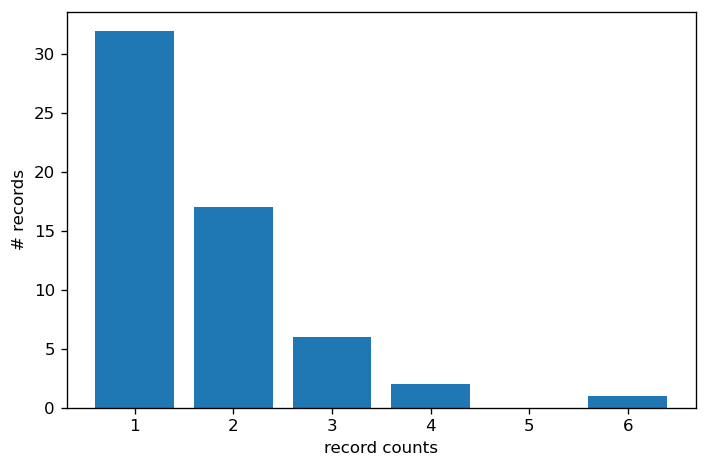

In [35]:
fig, ax = plt.subplots(**figargs)

synthdata_record_counts_per_id = synthdata.groupby('record_id').size().value_counts().sort_index()

ax.bar(synthdata_record_counts_per_id.index, synthdata_record_counts_per_id)
ax.set(xlabel='record counts', ylabel='# records')

fig.tight_layout()

### Genes

What genes do we have in the dataset?

In [36]:
genes = synthdata.loc[:, synthdata.columns.str.match(r'ln_47999_8_hgnc_\d')]\
  .melt(ignore_index=False)\
  .loc[lambda x: x['value'].str.contains('^HGNC:.*', na=False), 'value']
genes.unique()

array(['HGNC:6932'], dtype=object)

## Orchestrate the mapping 

Let's iterate over the dataset rows and map the data into phenopackets. We use the functions defined above.

In [38]:
from src.MapERKER2Phenopackets import map_erker2phenopackets
erker_phenopackets = map_erker2phenopackets(df=synthdata, created_by=created_by)

## Store the phenopackets into JSON files

Let's store the phenopackets into JSON files, one file per phenopacket. We store the phenopackets in `phenopackets` folder by default.

In [39]:
from src.Phenopackets2JSON import write_phenopackets2json_files
write_phenopackets2json_files(erker_phenopackets, output_folder='phenopackets')

**Done!**